In [162]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [163]:
re_data = pd.read_csv('Real estate.csv')

In [164]:
re_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [165]:
re_data = re_data.drop('No',axis=1)

In [166]:
re_data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [167]:
re_data = re_data.rename(columns={'X1 transaction date': 'transaction date', 'X2 house age': 'house age',
                                  'X3 distance to the nearest MRT station': 'distance to the nearest MRT station',
                                 'X4 number of convenience stores': 'number of convenience stores',
                                 'X5 latitude':'latitude','X6 longitude':'longitude',
                                  'Y house price of unit area':'house price of unit area'})

In [168]:
re_data

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [169]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [170]:
re_data.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


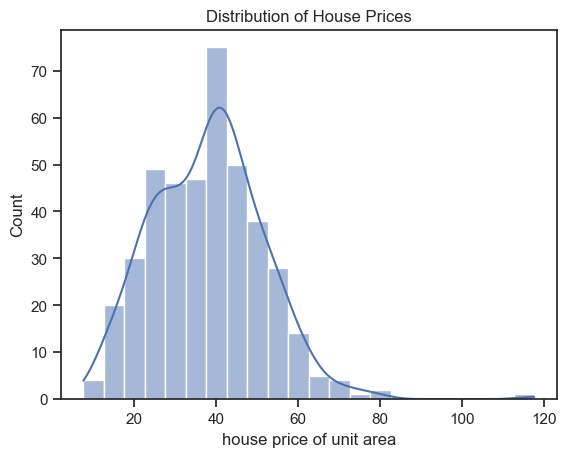

In [172]:
sns.histplot(re_data['house price of unit area'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

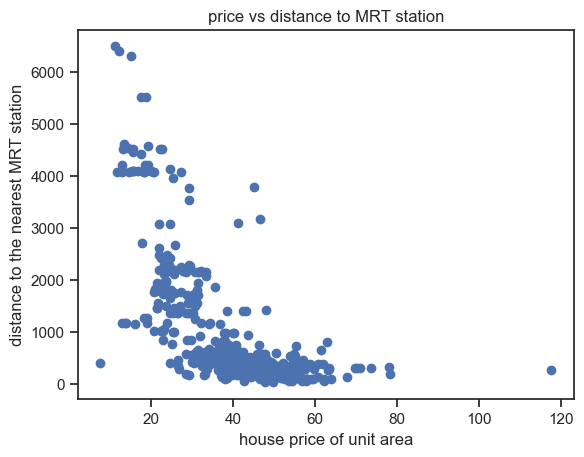

In [173]:
x=re_data['house price of unit area']
y=re_data['distance to the nearest MRT station']

plt.scatter(x, y)

plt.xlabel('house price of unit area')
plt.ylabel('distance to the nearest MRT station')
plt.title('price vs distance to MRT station')

plt.show()

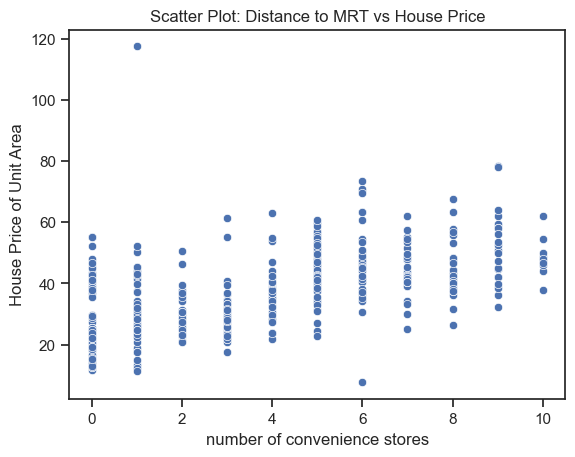

In [174]:
sns.scatterplot(x='number of convenience stores', y='house price of unit area', data=re_data)

plt.xlabel('number of convenience stores')
plt.ylabel('House Price of Unit Area')
plt.title('Scatter Plot: Distance to MRT vs House Price')

plt.show()

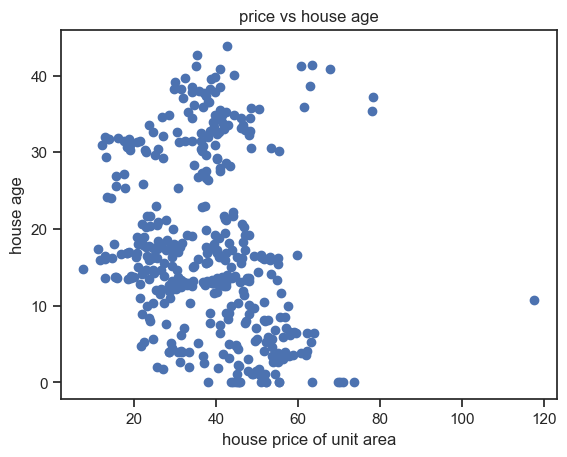

In [175]:
x=re_data['house price of unit area']
y=re_data['house age']

plt.scatter(x, y)

plt.xlabel('house price of unit area')
plt.ylabel('house age')
plt.title('price vs house age')

plt.show()

In [176]:
df = ['house age','distance to the nearest MRT station','number of convenience stores',
                          'house price of unit area']

In [177]:
df = re_data[df]

In [178]:
corr_matrix = df.corr()

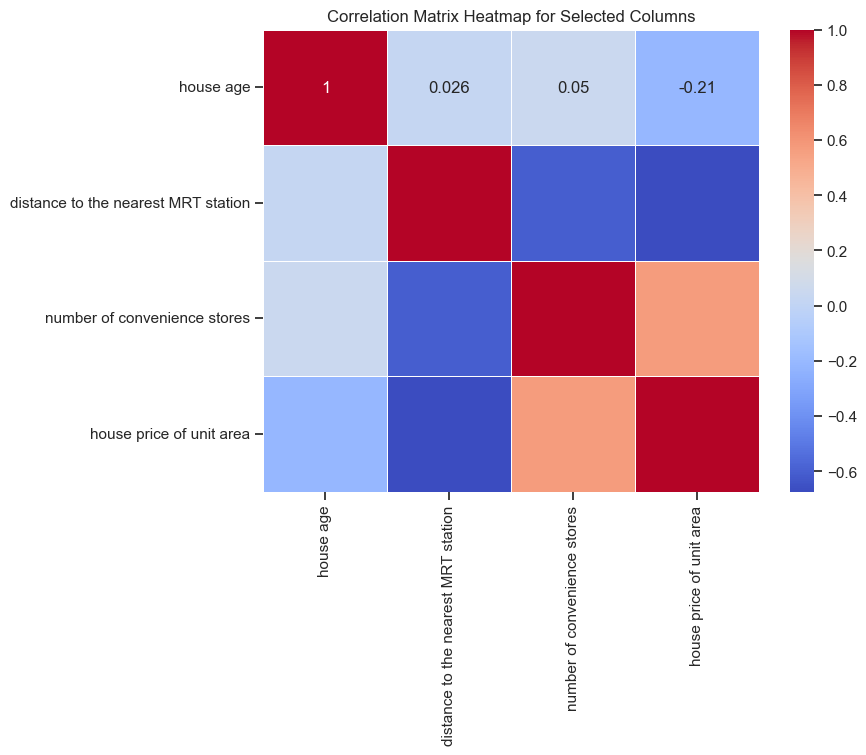

In [179]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Correlation Matrix Heatmap for Selected Columns')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

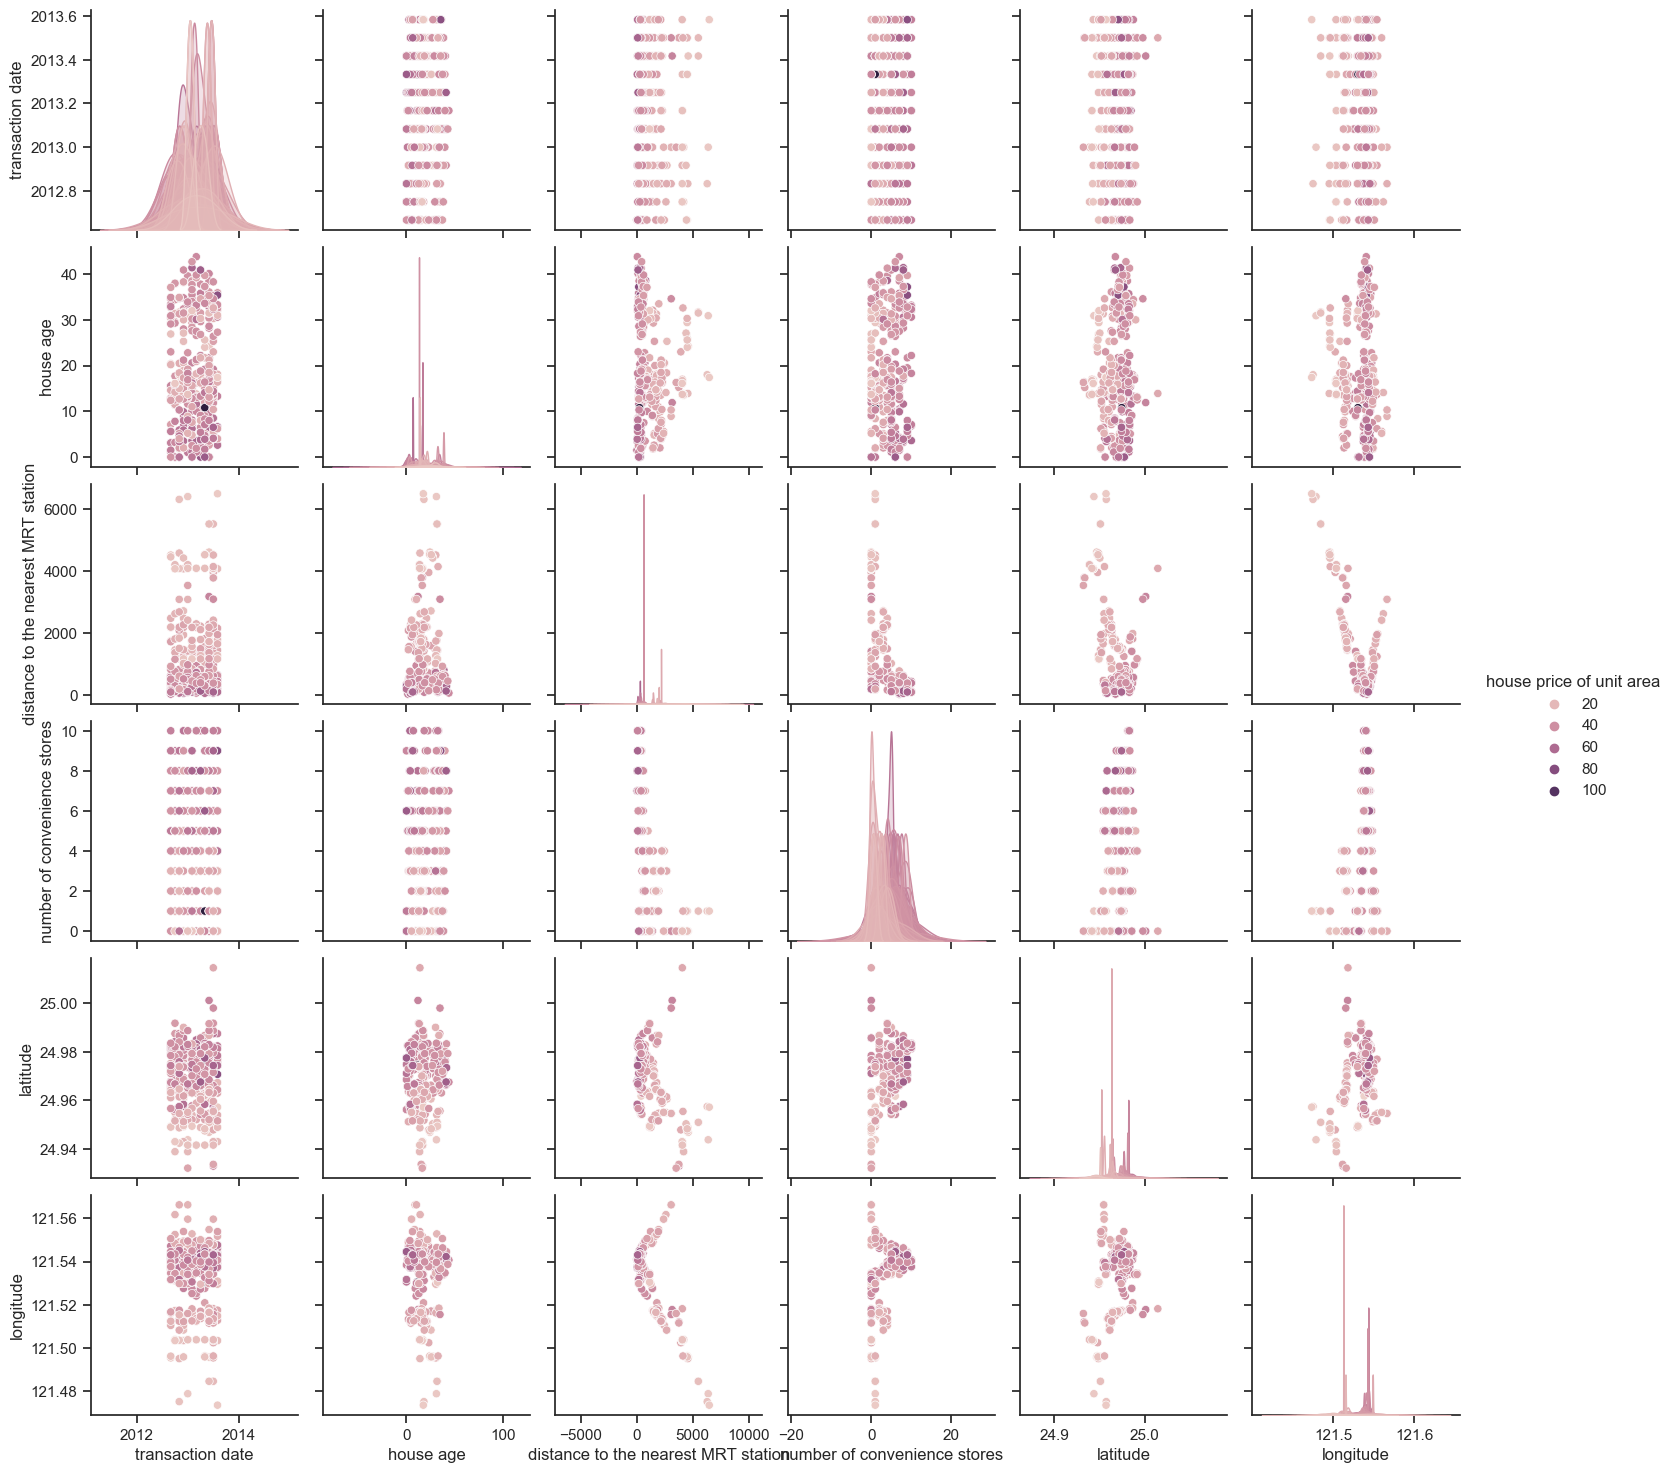

In [180]:
sns.set_theme(style="ticks")
sns.pairplot(re_data, hue="house price of unit area")

In [181]:
re_data.columns

Index(['transaction date', 'house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area'],
      dtype='object')

In [246]:
X=re_data[['house age', 'distance to the nearest MRT station',
       'number of convenience stores']]
y=re_data['house price of unit area']

In [247]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [248]:
lr = LinearRegression()

In [249]:
lr.fit(X_train,y_train)

LinearRegression()

In [250]:
predictions = lr.predict(X_test)

In [251]:
print(predictions)

[49.3309845  43.65403121 42.87191601 40.56595063 30.0719962  43.39940169
 44.17707972 44.10885629 29.47746336 52.41324084 32.28239215 33.96761808
 34.03564663 29.44279365 34.87510778 32.69329994 43.44790509 50.82798534
 31.55559314 46.3358957   1.53657545 32.84750223 45.99754481 45.78513426
 16.56434877 40.46870463 16.63744385 42.87191601 39.17392894 36.51838164
 11.93809376 37.01000705 41.03039244 32.38550188 45.09995193 31.83452095
 52.57242883 17.16518191 46.29808303 42.17869266 34.29476549 40.30495375
 47.91994547 37.89313718 43.6995135  48.10184104 46.61323903 25.2925562
 51.44550662 47.7016948  49.3309845  46.39898256 40.44848437 43.45582657
 37.39703123 17.14244077 38.29371437 34.36238768 30.00377277 44.10885629
 32.99396786 30.65819808 17.14244077 12.10530606  4.09254284 32.87024337
 33.44247943 46.88625222 33.87625896 34.05649026 48.07001041 35.29256458
 50.80524419 46.98488309 36.46330173 38.41614962 36.13808365 44.7014199
 40.87465196 26.9526795  39.92886785 44.24530314 34.1

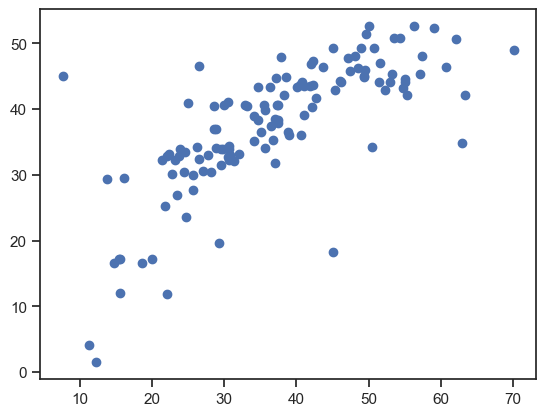

In [252]:
plt.scatter(y_test,predictions)

/var/folders/mq/f7rytp897r57f8vg9b1gq_v00000gn/T/ipykernel_26618/2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='house price of unit area', ylabel='Density'>

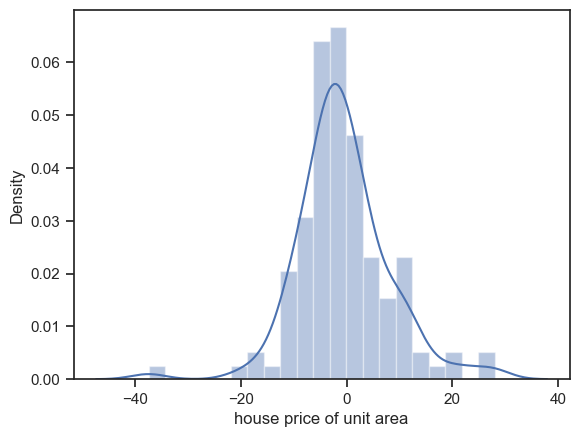

In [264]:
sns.distplot(y_test-predictions)

In [253]:
lr.intercept_

43.15575331658921

In [254]:
lr.coef_

array([-0.22741142, -0.00560386,  1.25170065])

In [255]:
X_train.columns

Index(['house age', 'distance to the nearest MRT station',
       'number of convenience stores'],
      dtype='object')

In [256]:
df = pd.DataFrame(lr.coef_,X.columns,columns = ['coef'])

In [257]:
df

,coef
house age,-0.227411
distance to the nearest MRT station,-0.005604
number of convenience stores,1.251701


In [258]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [259]:
print(mse)

75.58570700589277


In [260]:
print(r2)

0.5480002720789094
